In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

C:\Users\Hasnain\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


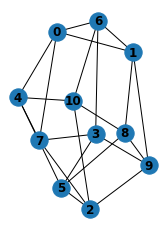

In [3]:
G = nx.random_regular_graph(4,11)
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

In [4]:
#Q-Learning starts

#Initialize Reward and Q matrix
R = np.matrix(np.zeros(shape=(11,11)))
for x in G[10]:
    R[x,10] = 100
    
Q = np.matrix(np.zeros(shape=(11,11)))
Q -= 100
for node in G.nodes:
    for x in G[node]:
        Q[node,x]=0
        Q[x,node]=0

In [5]:
#Look at both of the matrices

pd.DataFrame(R)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8,9,10
0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0
1,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0,0.0,-100.0
2,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0,-100.0,0.0,0.0
3,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,0.0,0.0,-100.0,0.0,-100.0
4,0.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0,-100.0,-100.0,0.0
5,-100.0,-100.0,0.0,0.0,0.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0
6,0.0,0.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0
7,0.0,-100.0,0.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
8,-100.0,0.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,0.0,0.0
9,-100.0,0.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0


In [20]:
#next steps
def next_step(start):
    random_value = random.uniform(0,1)
    if(random_value < 0.5):
        sample=G[start]
    else:
        sample=np.where(Q[start,] == np.max(Q[start,]))[1]
    next_node=int(np.random.choice(sample,1))
    return next_node

In [25]:
#update Q-Value
def updateQTable(node1, node2):
    max_index=np.where(Q[node2,] == np.max(Q[node2,]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
    max_value = Q[node2, max_index]
    Q[node1,node2] = int((0.5)*Q[node1, node2]+0.5*(R[node1, node2] + 0.8*max_value))

In [26]:
#learning by iterating n times

for i in range(50000):
    start = np.random.randint(0,11)
    next_node=next_step(start)
    updateQTable(start, next_node)



pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8,9,10
0,-100.0,171.0,-100.0,-100.0,215.0,-100.0,215.0,171.0,-100.0,-100.0,-100.0
1,171.0,-100.0,-100.0,-100.0,-100.0,-100.0,215.0,-100.0,215.0,171.0,-100.0
2,-100.0,-100.0,-100.0,-100.0,-100.0,171.0,-100.0,171.0,-100.0,171.0,271.0
3,-100.0,-100.0,-100.0,-100.0,-100.0,171.0,215.0,171.0,-100.0,171.0,-100.0
4,171.0,-100.0,-100.0,-100.0,-100.0,171.0,-100.0,171.0,-100.0,-100.0,271.0
5,-100.0,-100.0,215.0,171.0,215.0,-100.0,-100.0,-100.0,215.0,-100.0,-100.0
6,171.0,171.0,-100.0,171.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,271.0
7,171.0,-100.0,215.0,171.0,215.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
8,-100.0,171.0,-100.0,-100.0,-100.0,171.0,-100.0,-100.0,-100.0,171.0,271.0
9,-100.0,171.0,215.0,171.0,-100.0,-100.0,-100.0,-100.0,215.0,-100.0,-100.0


In [27]:
def get_shortest_path(begin, end):
    path=[begin]
    next_node = np.argmax(Q[begin,])
    path.append(next_node)
    while next_node != end:
        #previous_node = next_node
        next_node = np.argmax(Q[next_node,])
        #Q[next_node,previous_node] = 0
        path.append(next_node)
        
    return path

get_shortest_path(0,10)

[0, 4, 10]

In [ ]:
#Simulate 100 times
number_of_transmissions = []

for i in range(100):
    nhops = shortest_path(0,10)
    number_of_transmissions.append(len(nhops))
    

In [ ]:
x= []
for i in range(100):
    x.append(i)
    
plt.title("Number of transmissions from node 0 to 10 ")
plt.xlabel("Simulation number")
plt.ylabel("Number of transmissions")

plt.plot(x, number_of_transmissions, label='Simulation Results')
plt.legend()